# Inferring bacterial growth rate from microscopy data

This exercise was generated from a Jupyter notebook. You can download the notebook [here](bacterial_growth_in_class.ipynb).

In [129]:
# Import useful modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For reading images
import skimage.io

# For reading all images
import glob

# For pretty plots
import seaborn as sns
sns.set()

In [4]:
# Import an example image
im = skimage.io.imread('data/ecoli_growth/ecoli_phase_05.tif')

In [5]:
# Take a look
im

array([[370, 366, 350, ..., 355, 360, 352],
       [354, 363, 362, ..., 354, 357, 353],
       [359, 374, 365, ..., 356, 355, 356],
       ..., 
       [357, 359, 352, ..., 352, 352, 355],
       [349, 353, 362, ..., 342, 353, 353],
       [358, 360, 366, ..., 356, 350, 365]], dtype=uint16)

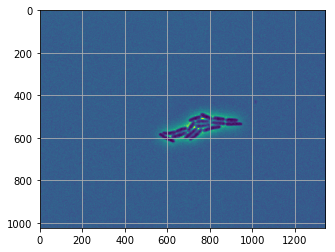

In [11]:
# Show the image
plt.imshow(im)

# Turn the grid on
plt.grid('on')

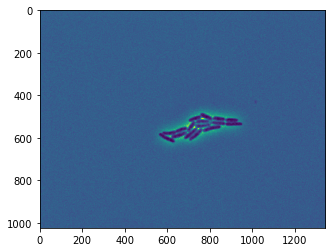

In [13]:
# Show the image
plt.imshow(im)

# Turn the grid off
plt.grid('off')

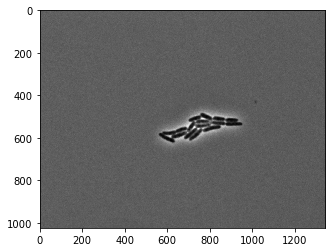

In [14]:
# Show the image in greyscale
plt.imshow(im, cmap = plt.cm.Greys_r)

In [17]:
# Sample array
mat = np.array([3, 6, 9])
mat

array([3, 6, 9])

In [19]:
# Subtract the lowest value
mat_subtract = mat - np.min(mat)
mat_subtract

array([0, 3, 6])

In [22]:
# Normalization
mat_norm = mat_subtract / np.max(mat_subtract)
mat_norm

array([ 0. ,  0.5,  1. ])

In [23]:
# Normalization version 2
mat_norm_2 = (mat - np.min(mat))/(np.max(mat) - np.min(mat))
mat_norm_2

array([ 0. ,  0.5,  1. ])

In [25]:
# Normalized image
im_float = (im - np.min(im)) / (np.max(im) - np.min(im))
im_float

array([[ 0.32444444,  0.31555556,  0.28      , ...,  0.29111111,
         0.30222222,  0.28444444],
       [ 0.28888889,  0.30888889,  0.30666667, ...,  0.28888889,
         0.29555556,  0.28666667],
       [ 0.3       ,  0.33333333,  0.31333333, ...,  0.29333333,
         0.29111111,  0.29333333],
       ..., 
       [ 0.29555556,  0.3       ,  0.28444444, ...,  0.28444444,
         0.28444444,  0.29111111],
       [ 0.27777778,  0.28666667,  0.30666667, ...,  0.26222222,
         0.28666667,  0.28666667],
       [ 0.29777778,  0.30222222,  0.31555556, ...,  0.29333333,
         0.28      ,  0.31333333]])

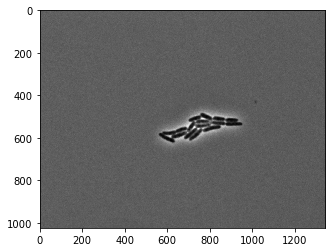

In [27]:
plt.imshow(im_float, cmap = plt.cm.Greys_r)

<IPython.core.display.Javascript object>


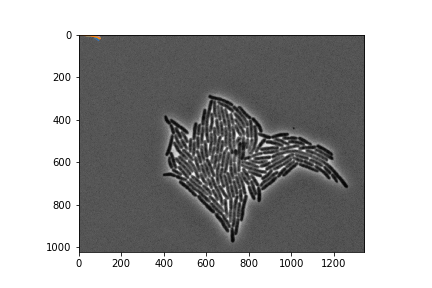

In [113]:
# Interact with the image
%matplotlib notebook
plt.imshow(im_float, cmap = plt.cm.Greys_r)

In [32]:
# Sample array
mat2 = np.array([1, 3, 4, 5, 10, 12, 15])

(array([ 1.,  1.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([  1. ,   2.4,   3.8,   5.2,   6.6,   8. ,   9.4,  10.8,  12.2,
         13.6,  15. ]),
 <a list of 10 Patch objects>)

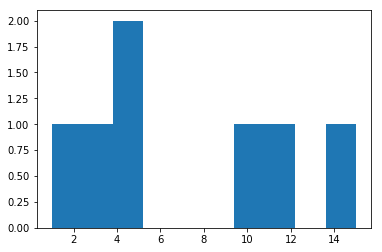

In [37]:
# Switch back to inline (non-interactive)
%matplotlib inline

# Plot a sample histrogram
plt.hist(mat2)

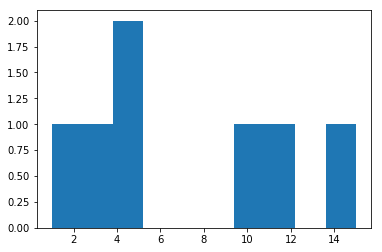

In [38]:
# Suppress the output
_ = plt.hist(mat2)
plt.show()

In [41]:
# Dimensions of the 2d image
im_float.shape

(1024, 1344)

In [39]:
# Convert the image into a 1d array
im_float_1d = im_float.flatten()
im_float_1d

array([ 0.32444444,  0.31555556,  0.28      , ...,  0.29333333,
        0.28      ,  0.31333333])

In [42]:
im_float_1d.shape

(1376256,)

In [43]:
1024*1344

1376256

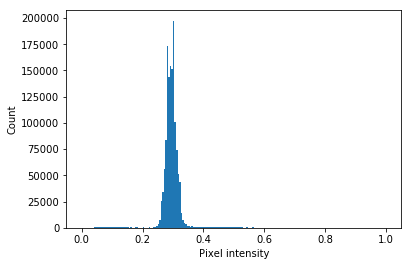

In [51]:
_ = plt.hist(im_float_1d, bins = 200)
plt.xlabel('Pixel intensity')
plt.ylabel('Count')
plt.show()

In [53]:
# Define the threshold
threshold = 0.2

# Threshold the image
im_thresh = im_float < threshold

im_thresh

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

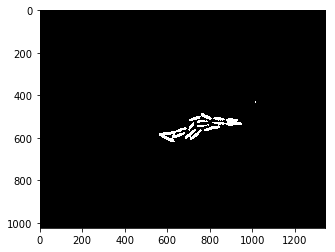

In [54]:
# Show the thresholded image
plt.imshow(im_thresh, cmap = plt.cm.Greys_r)

In [56]:
# Bacterial colony area
area = np.sum(im_thresh)

area

12633

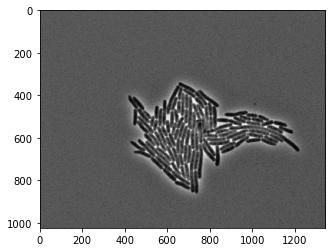

In [58]:
# Import an image at a later frame
im2 = skimage.io.imread('data/ecoli_growth/ecoli_phase_18.tif')

# Show the image
plt.imshow(im2, cmap = plt.cm.Greys_r)
plt.show()

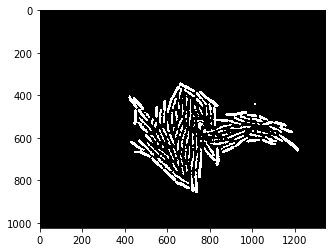

In [60]:
# Normalize the image
im_float2 = (im2 - np.min(im2)) / (np.max(im2) - np.min(im2))

# Threshold the image
im_thresh2 = im_float2 < threshold

# Show the thresholded image
plt.imshow(im_thresh2, cmap = plt.cm.Greys_r)
plt.show()

In [128]:
# Read the filenames of all image
im_names = sorted(glob.glob('data/ecoli_growth/ecoli_phase_*.tif'))

im_names

['data/ecoli_growth/ecoli_phase_00.tif',
 'data/ecoli_growth/ecoli_phase_01.tif',
 'data/ecoli_growth/ecoli_phase_02.tif',
 'data/ecoli_growth/ecoli_phase_03.tif',
 'data/ecoli_growth/ecoli_phase_04.tif',
 'data/ecoli_growth/ecoli_phase_05.tif',
 'data/ecoli_growth/ecoli_phase_06.tif',
 'data/ecoli_growth/ecoli_phase_07.tif',
 'data/ecoli_growth/ecoli_phase_08.tif',
 'data/ecoli_growth/ecoli_phase_09.tif',
 'data/ecoli_growth/ecoli_phase_10.tif',
 'data/ecoli_growth/ecoli_phase_11.tif',
 'data/ecoli_growth/ecoli_phase_12.tif',
 'data/ecoli_growth/ecoli_phase_13.tif',
 'data/ecoli_growth/ecoli_phase_14.tif',
 'data/ecoli_growth/ecoli_phase_15.tif',
 'data/ecoli_growth/ecoli_phase_16.tif',
 'data/ecoli_growth/ecoli_phase_17.tif',
 'data/ecoli_growth/ecoli_phase_18.tif',
 'data/ecoli_growth/ecoli_phase_19.tif',
 'data/ecoli_growth/ecoli_phase_20.tif']

In [65]:
# Number of image
n_frames = len(im_names)

n_frames

21

In [102]:
# Array to store area value
areas = np.zeros(n_frames)

# List structure to store the areas
areas_ls = []

for i in range(n_frames):

    # Name of the frame
    name = im_names[i]
    
    # Read the image
    im = skimage.io.imread(name)
    
    # Normalize it
    im_float = (im - np.min(im))/(np.max(im) - np.min(im))
    
    # Threshold
    im_thresh = im_float < threshold
    
    # Find the area
    area = np.sum(im_thresh)
    
    # Assign the index
    areas[i] = area # Option 1
    areas_ls.append(area) # Option 2

In [103]:
# Time resolution in minutes
dt = 5

# Time points of measurements in minutes
times = np.arange(n_frames)*dt

times

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

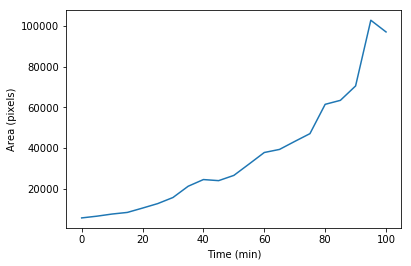

In [84]:
# Plot the dynamics of bacterial colony area
plt.plot(times, areas)
plt.xlabel('Time (min)')
plt.ylabel('Area (pixels)')
plt.show()

In [131]:
# Concatenating strings
'ABC' + 'CDE'

'ABCCDE'

In [133]:
# String and a number (gives an error)
'ABC' + 3

TypeError: must be str, not int

In [134]:
'ABC' + str(3)

'ABC3'

In [151]:
# Normalized area
areas_norm = areas / areas[0]
areas_norm

array([  1.        ,   1.15259392,   1.3411449 ,   1.48300537,
         1.86440072,   2.25992844,   2.79481216,   3.78568873,
         4.37191413,   4.27710197,   4.73774597,   5.73792487,
         6.75116279,   7.02182469,   7.72432916,   8.40912343,
        10.9862254 ,  11.33577818,  12.60286225,  18.37889088,  17.35008945])

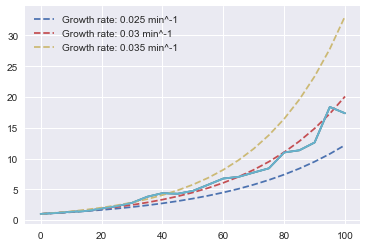

In [139]:
# Starting condition
N0 = 1

# Growth rate in min^-1
rates = [0.025, 0.030, 0.035]

for i in range(3):
    # Number of bacteria at different time points
    N = N0 * np.exp(rates[i] * times)
    
    # Label of theoretical curve
    label = 'Growth rate: ' + str(rates[i]) + ' min^-1'

    # Plot the time dynamics
    plt.plot(times, N, '--', label = label)
    plt.plot(times, areas_norm)
    
# Show the legends
plt.legend()
plt.show()

In [140]:
areas_norm

array([  1.        ,   1.15259392,   1.3411449 ,   1.48300537,
         1.86440072,   2.25992844,   2.79481216,   3.78568873,
         4.37191413,   4.27710197,   4.73774597,   5.73792487,
         6.75116279,   7.02182469,   7.72432916,   8.40912343,
        10.9862254 ,  11.33577818,  12.60286225,  18.37889088,  17.35008945])

In [141]:
np.exp(1)

2.7182818284590451

In [142]:
np.exp(np.array([1,2,3]))

array([  2.71828183,   7.3890561 ,  20.08553692])

In [144]:
# Time points in minutes
times

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [149]:
# Sample growth rate in min^-1
rate = 0.035

# Theoretical prediction of the fractional increase
areas_norm_theory = np.exp(rate*times)
areas_norm_theory

array([  1.        ,   1.19124622,   1.41906755,   1.69045885,
         2.01375271,   2.39887529,   2.85765112,   3.40416608,
         4.05519997,   4.83074162,   5.75460268,   6.85514867,
         8.16616991,   9.72791901,  11.58834672,  13.80457419,
        16.44464677,  19.58962325,  23.33606458,  27.79899864,  33.11545196])

In [150]:
# error for a given growth rate
error = np.sum((areas_norm_theory - areas_norm)**2)
error

606.70448689593491

In [152]:
# Function to evaluate error for a given growth rate
def err (areas_norm, rate, times):
    areas_norm_theory = np.exp(rate*times)
    error = np.sum((areas_norm_theory - areas_norm)**2)
    return error

In [172]:
# Limits of the growth rates in min^-1
rate_low = 0.028
rate_high = 0.031
n_points = 1000

# List of growth rates within the specified range
rate_ls = np.linspace(rate_low, rate_high, n_points)

In [173]:
# Array for storing errors
err_ls = np.zeros(n_points)

for i in range(n_points):
    rate = rate_ls[i]
    err_ls[i] = err(areas_norm, rate, times)

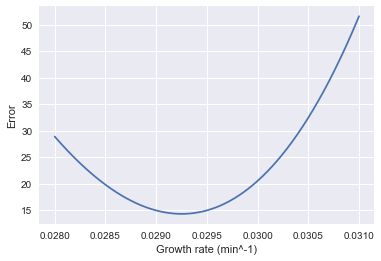

In [174]:
plt.plot(rate_ls, err_ls)
plt.xlabel('Growth rate (min^-1)')
plt.ylabel('Error')
plt.show()

In [175]:
# Lowest error value
np.min(err_ls)

14.28652376911114

In [177]:
# err_ls == np.min(err_ls)

In [183]:
index = np.where(err_ls == np.min(err_ls))

In [184]:
# Optimum growth rate in min^-1
rate_ls[index]

array([ 0.02925225])

In [185]:
# Doubling time in minutes
np.log(2)/rate_ls[index]

array([ 23.69551495])